In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        break
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv("/kaggle/input/clothes/train/_classes.csv")

In [3]:
base = "/kaggle/input/clothes/train/"

In [4]:
df["filename"] = base + df["filename"]

In [5]:
df.columns = [col.strip() for col in df.columns.tolist()] # strip whitespaces in column names
df

filename  beige  black  blue  \
0     /kaggle/input/clothes/train/green164_jpg.rf.a8...      0      0     0   
1     /kaggle/input/clothes/train/gray294_jpg.rf.a8f...      0      0     0   
2     /kaggle/input/clothes/train/gray136_jpg.rf.a89...      0      0     0   
3     /kaggle/input/clothes/train/black179_jpg.rf.a8...      0      1     0   
4     /kaggle/input/clothes/train/gray88_jpg.rf.a8c8...      0      0     0   
...                                                 ...    ...    ...   ...   
4834  /kaggle/input/clothes/train/green189_jpg.rf.ec...      0      0     0   
4835  /kaggle/input/clothes/train/red251_jpg.rf.ed2a...      0      0     0   
4836  /kaggle/input/clothes/train/red2_jpg.rf.ed3cf5...      0      0     0   
4837  /kaggle/input/clothes/train/white125_jpg.rf.ed...      0      0     0   
4838  /kaggle/input/clothes/train/blue14_jpg.rf.ed71...      0      0     1   

      gray  green  pattren  red  white  
0        0      1        0    0      0  
1        1      0        0    0      0  
2        1      0        0    0      0  
3        0      0        0    0      0  
4        1      0        0    0      0  
...    ...    ...      ...  ...    ...  
4834     0      1        0    0      0  
4835     0      0        0    1      0  
4836     0      0        0    1      0  
4837     0      0        0    0      1  
4838     0      0        0    0      0  

[4839 rows x 9 columns]

In [6]:
def filtre_dataframe(dataframe):
    """
    a function to get first 20 record of each class
    
    inputs
    dataframe : the dataframe which will be using for filter.
    
    return:
    filtered_df: the dataframe with first 20 record of each class.
    
    """
    cols = [col for col in dataframe.columns if col in ("red" , "blue", "green", "gray", "white")]
    filtered_df = pd.DataFrame()
    for col in cols:
        first_20 = dataframe[dataframe[col] == 1][:20]
        filtered_df = pd.concat([filtered_df, first_20])
    
    filtered_df = filtered_df[["filename"] + cols]
    return filtered_df
        

In [7]:
# selecting first 20 clothes of each class
df = filtre_dataframe(df)
df.reset_index(drop = True, inplace = True)

In [8]:
df.columns

Index(['filename', 'blue', 'gray', 'green', 'red', 'white'], dtype='object')

In [9]:
image = cv2.imread("/kaggle/input/clothes/train/blue74_jpg.rf.a9fafc3d78591da2b947efcfdbda3d81.jpg")

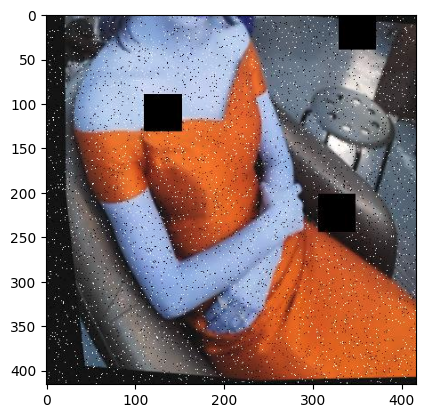

In [10]:
plt.imshow(image)
plt.show() ## THAT IS BLUE !

In [11]:
print("Image shape:", image.shape)
blue, green, red = cv2.split(image)
print("Blue matrix:\n", blue)
print("Green matrix:\n", green)
print("Red matrix:\n", red)

Image shape: (416, 416, 3)
Blue matrix:
 [[20 20 20 ... 18 28  0]
 [20 20 20 ... 18 28 26]
 [20 20 20 ... 36  3 15]
 ...
 [14  8 35 ... 18 15 12]
 [18 23 21 ... 17 13 10]
 [19 21 18 ... 15 17 17]]
Green matrix:
 [[20 20 20 ... 18 28  0]
 [20 20 20 ... 18 28 26]
 [20 20 20 ... 38  5 17]
 ...
 [14  8 35 ... 19 16 13]
 [18 23 21 ... 18 14 11]
 [19 21 18 ... 14 16 16]]
Red matrix:
 [[20 20 20 ... 18 28  0]
 [20 20 20 ... 18 28 26]
 [20 20 20 ... 38  5 17]
 ...
 [14  8 35 ... 23 20 17]
 [18 23 21 ... 16 12  9]
 [19 21 18 ... 10 12 12]]


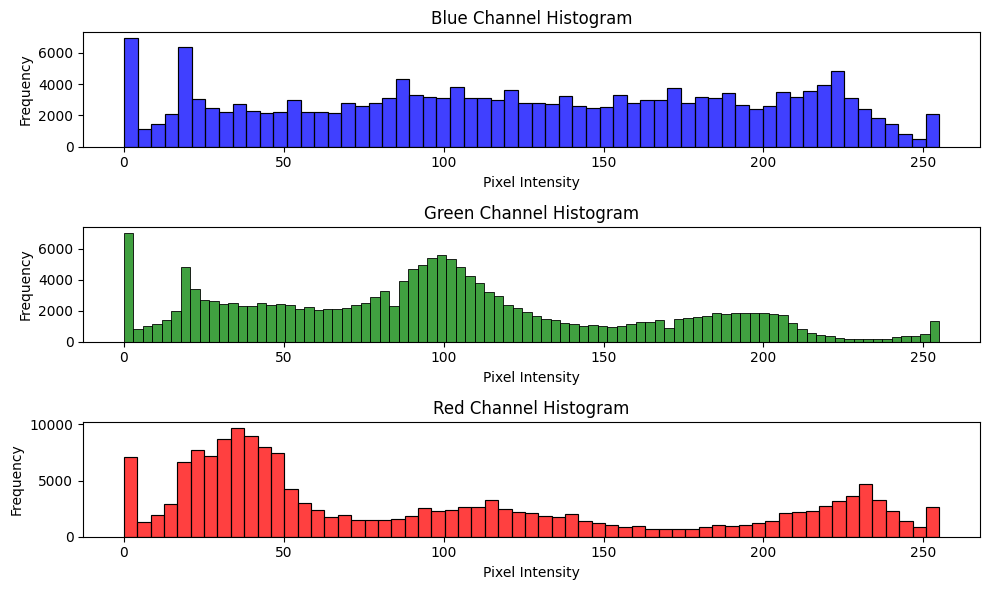

In [12]:
# splitting into RGB
blue, green, red = cv2.split(image)

# flat matrices
blue_flat = blue.ravel()
green_flat = green.ravel()
red_flat = red.ravel()

# Plot histograms for each color channel
plt.figure(figsize=(10, 6))

# Plot histogram for the bluee
plt.subplot(3, 1, 1)
sns.histplot(blue_flat, kde=False, color='blue')
plt.title('Blue Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Histogram for green
plt.subplot(3, 1, 2)
sns.histplot(green_flat, kde=False, color='green')
plt.title('Green Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Histogram for red
plt.subplot(3, 1, 3)
sns.histplot(red_flat, kde=False, color='red')
plt.title('Red Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

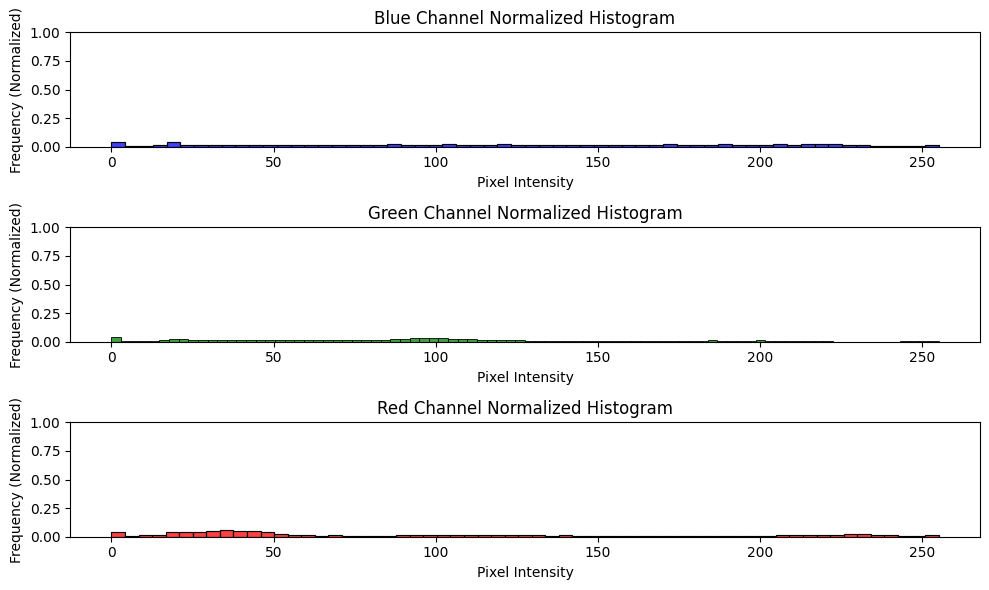

In [13]:
# splitting the image into its RGB components
blue, green, red = cv2.split(image)

# Flatten the matrices
blue_flat = blue.ravel()
green_flat = green.ravel()
red_flat = red.ravel()

# will be divided 255 to normalize
total_pixels = 255

# normalized channel plot
plt.figure(figsize=(10, 6))

# blue channel
plt.subplot(3, 1, 1)
sns.histplot(blue_flat, kde=False, color='blue', stat='probability')
plt.title('Blue Channel Normalized Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency (Normalized)')
plt.ylim([0, 1]) 

# green channel
plt.subplot(3, 1, 2)
sns.histplot(green_flat, kde=False, color='green', stat='probability')
plt.title('Green Channel Normalized Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency (Normalized)')
plt.ylim([0, 1])  

# red channel
plt.subplot(3, 1, 3)
sns.histplot(red_flat, kde=False, color='red', stat='probability')
plt.title('Red Channel Normalized Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency (Normalized)')
plt.ylim([0, 1])

plt.tight_layout()
plt.show()

In [14]:
# Function to normalize an image's RGB components
def normalize_image(image):
    return image / total_pixels

In [15]:
# a function to load images and create a dataset
def create_dataset(dataframe):
    dataset = []
    for filename in dataframe.filename:
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # read images
            image = cv2.imread(filename)
            
            if image is not None:
                # splitting the image into its RGB components and normalize
                blue, green, red = cv2.split(image)
                blue_norm = normalize_image(blue)
                green_norm = normalize_image(green)
                red_norm = normalize_image(red)
                
                # merge the normalized components back into an RGB image
                normalized_image = cv2.merge([blue_norm, green_norm, red_norm])
                
                # add the normalized image to the dataset
                dataset.append(normalized_image)
    
    return np.array(dataset)

In [16]:
images_dataset = create_dataset(df)

In [17]:
images_dataset.shape

(100, 416, 416, 3)

In [18]:
images_dataset.shape

(100, 416, 416, 3)

## K-means implementation

In [19]:
class k_means_algorithm():
    def __init__(self, k, max_iteration = 100):
        self.k = k
        self.max_iteration = 100
        
    def __repr__(self):
        return f"K-means(), k = {self.k}, distance = manhattan" # will be used manhattan for the sake of time
    
    def __str__(self):
        return "k_means_object"
    
    def random_centers(self, dataframe):
        random_indices = np.random.choice(dataframe.shape[0], size=self.k, replace=False)
        random_centers = dataframe[random_indices]
        
        return random_centers
    
    def fit(self, dataset):
        # finding centroids 
        centroids = self.random_centers(dataset)
        
        # reshape 
        dataset = dataset.reshape(-1, 416*416*3)
        rs_centroids = centroids.reshape(-1, 416* 416*3)
        k = self.k
        max_iteration = self.max_iteration
        for i in range(max_iteration):
            # distance calculation between centers and pictures
            distances = (np.abs(dataset[:,np.newaxis] - rs_centroids)).sum(axis = 2) #newwaxiss
            labels = np.argmin(distances, axis=1)
    
            # assigning new centers
            new_centroids = np.array([dataset[labels == i].mean(axis=0) for i in range(k)])
    
            # stop if centers are the same
            if np.all(rs_centroids == new_centroids):
                print("converged")
                break
    
            # update centers again and again
            rs_centroids = new_centroids.copy()

        final_centers = rs_centroids.reshape(centroids.shape)
        
        return final_centers, labels
    
    def evaluate(self, dataframe):
        accuracy = 0
        for i in range(self.k):
            cache = (dataframe.loc[dataframe["label"] == i, (dataframe.columns != "filename" ) & (dataframe.columns != "label" ) ].sum() / dataframe[dataframe["label"] == i].count()[0]).max()
            accuracy += cache
        accuracy = accuracy / self.k
        
        return accuracy
        

In [20]:
kmeans = k_means_algorithm(k = 5, max_iteration = 2000)

In [21]:
final_centers, labels = kmeans.fit(images_dataset)

converged


In [22]:
df["label"] = pd.Series(labels)

In [23]:
accuracy = kmeans.evaluate(df)

In [24]:
accuracy_list = []
for i in range(10):
    kmeans = k_means_algorithm(k = 5, max_iteration = 2000)
    final_centers, labels = kmeans.fit(images_dataset)
    df["label"] = pd.Series(labels)
    accuracy = kmeans.evaluate(df)
    accuracy_list.append(accuracy)

converged
converged
converged
converged
converged
converged
converged
converged
converged
converged


In [25]:
accuracy_list

[0.61625,
 0.4495454545454546,
 0.49594979296066255,
 0.5514667685255921,
 0.5369078947368421,
 0.6340802987861812,
 0.6769100169779286,
 0.6288095238095238,
 0.5705107855107856,
 0.637962962962963]

In [26]:
def visiualize(labels):
    for i in labels:
        num_images = len(df[df["label"] == i])
        num_rows = 3  # Change this value to the number of rows you want
        num_cols = (num_images + num_rows - 1) // num_rows

        fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

        for idx, ax in enumerate(axes.flat):
            if idx < num_images:
                img = cv2.imread(df[df["label"]==i]["filename"].reset_index(drop = True)[idx])
                ax.imshow(img)
                ax.set_title(f"Image {idx + 1}")
                ax.axis('off')  # Remove axis ticks
            else:
                ax.axis('off')  # Hide extra empty subplots
        
        plt.suptitle(f"Label {i}", fontsize=16) # Set subplot title 
        plt.tight_layout()  # Adjust layout for better presentation
        plt.show()

In [27]:
df[df["label"] == 3]

filename  blue  gray  green  red  \
2   /kaggle/input/clothes/train/blue259_jpg.rf.aa4...     1     0      0    0   
8   /kaggle/input/clothes/train/blue211_jpg.rf.abe...     1     0      0    0   
10  /kaggle/input/clothes/train/blue190_jpg.rf.ad1...     1     0      0    0   
11  /kaggle/input/clothes/train/blue30_jpg.rf.ad9b...     1     0      0    0   
13  /kaggle/input/clothes/train/blue163_jpg.rf.ad3...     1     0      0    0   
18  /kaggle/input/clothes/train/blue277_jpg.rf.ad7...     1     0      0    0   
21  /kaggle/input/clothes/train/gray136_jpg.rf.a89...     0     1      0    0   
22  /kaggle/input/clothes/train/gray88_jpg.rf.a8c8...     0     1      0    0   
24  /kaggle/input/clothes/train/gray167_jpg.rf.a97...     0     1      0    0   
25  /kaggle/input/clothes/train/gray172_jpg.rf.aa8...     0     1      0    0   
31  /kaggle/input/clothes/train/gray238_jpg.rf.acd...     0     1      0    0   
40  /kaggle/input/clothes/train/green164_jpg.rf.a8...     0     0      1    0   
41  /kaggle/input/clothes/train/green46_jpg.rf.a8b...     0     0      1    0   
42  /kaggle/input/clothes/train/green116_jpg.rf.a9...     0     0      1    0   
43  /kaggle/input/clothes/train/green270_jpg.rf.aa...     0     0      1    0   
44  /kaggle/input/clothes/train/green67_jpg.rf.aa5...     0     0      1    0   
45  /kaggle/input/clothes/train/green159_jpg.rf.aa...     0     0      1    0   
46  /kaggle/input/clothes/train/green61_jpg.rf.aa5...     0     0      1    0   
51  /kaggle/input/clothes/train/green180_jpg.rf.ab...     0     0      1    0   
52  /kaggle/input/clothes/train/green213_jpg.rf.ab...     0     0      1    0   
53  /kaggle/input/clothes/train/green304_jpg.rf.ae...     0     0      1    0   
54  /kaggle/input/clothes/train/green151_jpg.rf.af...     0     0      1    0   
55  /kaggle/input/clothes/train/green140_jpg.rf.af...     0     0      1    0   
59  /kaggle/input/clothes/train/green116_jpg.rf.af...     0     0      1    0   
95  /kaggle/input/clothes/train/white35_jpg.rf.b04...     0     0      0    0   
99  /kaggle/input/clothes/train/white17_jpg.rf.b12...     0     0      0    0   

    white  label  
2       0      3  
8       0      3  
10      0      3  
11      0      3  
13      0      3  
18      0      3  
21      0      3  
22      0      3  
24      0      3  
25      0      3  
31      0      3  
40      0      3  
41      0      3  
42      0      3  
43      0      3  
44      0      3  
45      0      3  
46      0      3  
51      0      3  
52      0      3  
53      0      3  
54      0      3  
55      0      3  
59      0      3  
95      1      3  
99      1      3

In [28]:
image = cv2.imread(df.loc[8 , "filename"])

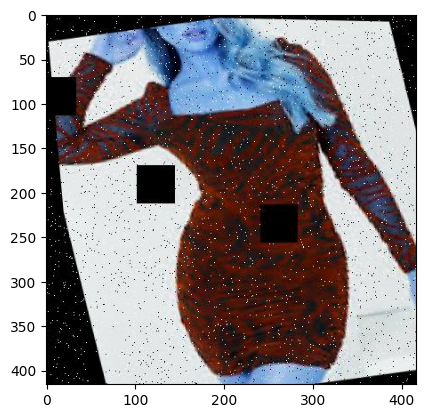

In [29]:
plt.imshow(image)
plt.show() ## THAT IS BLUE !

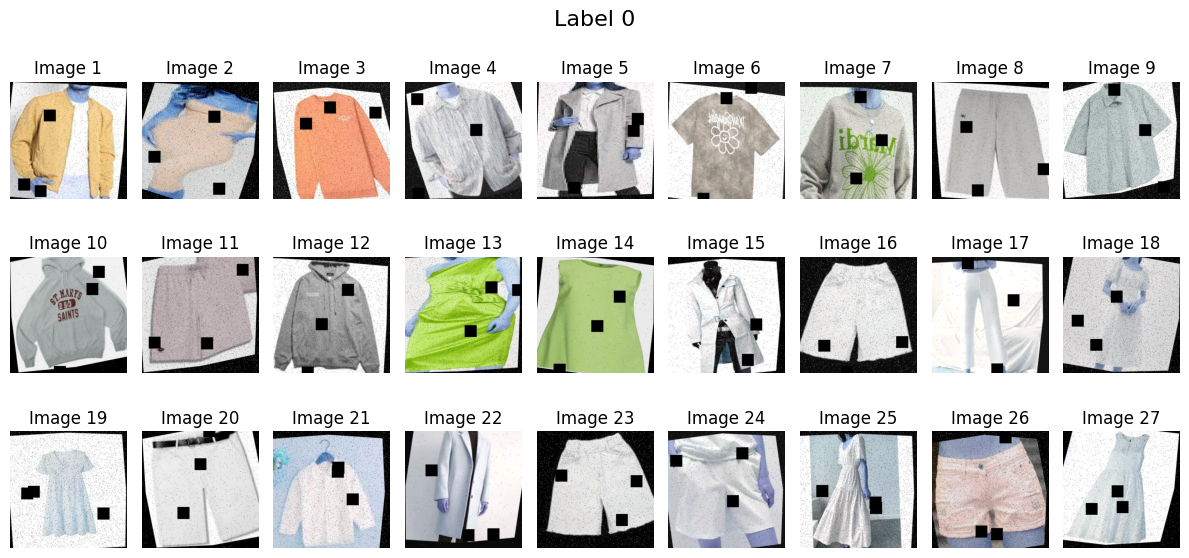

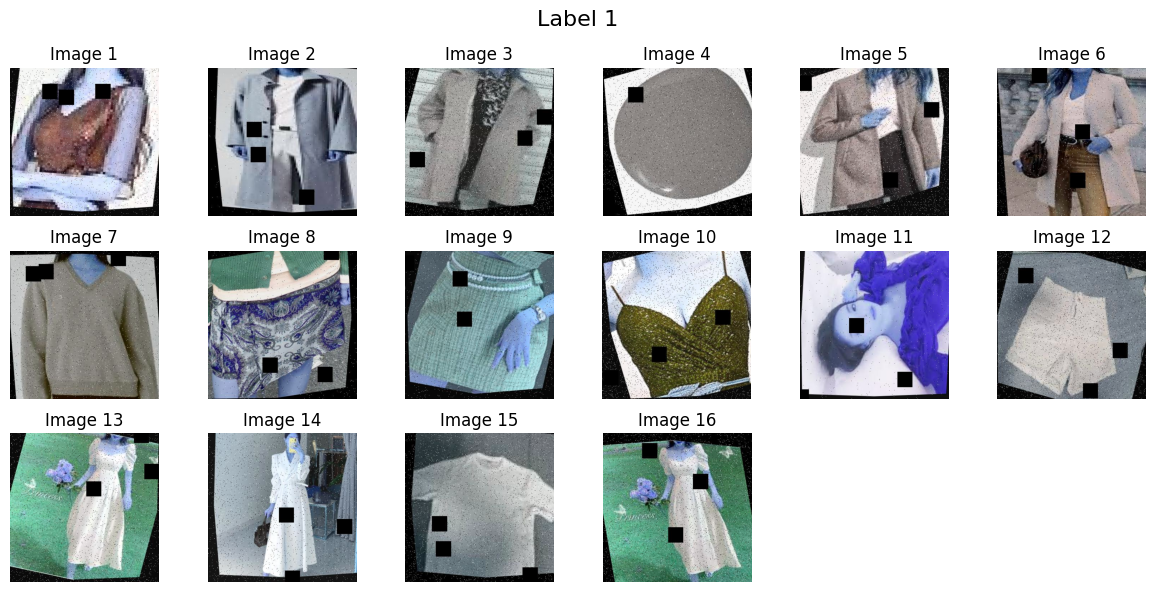

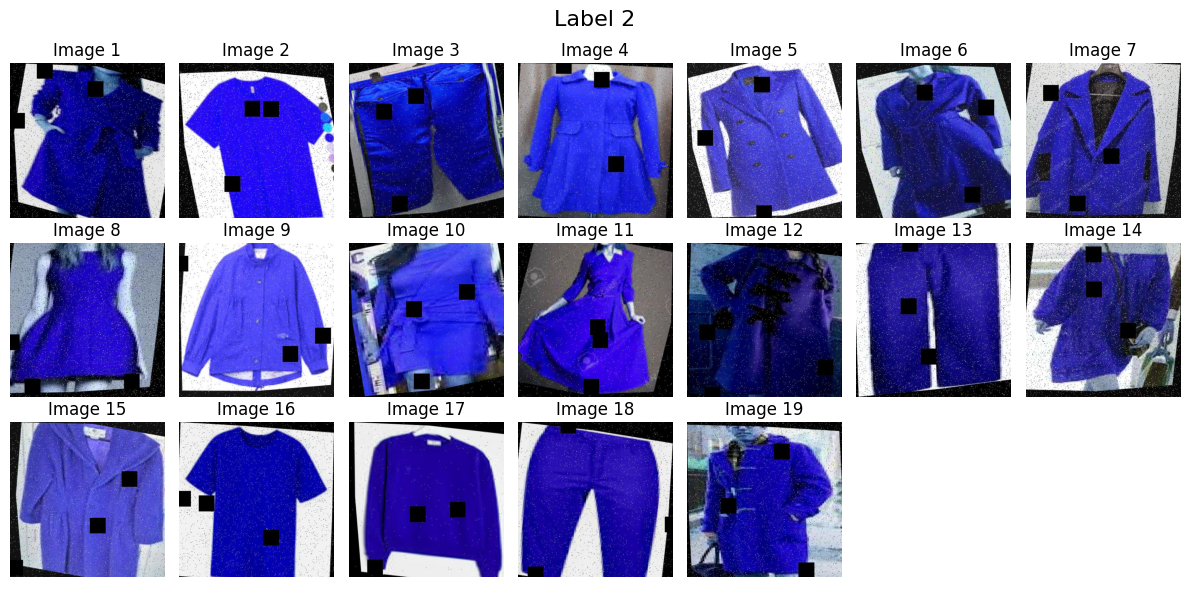

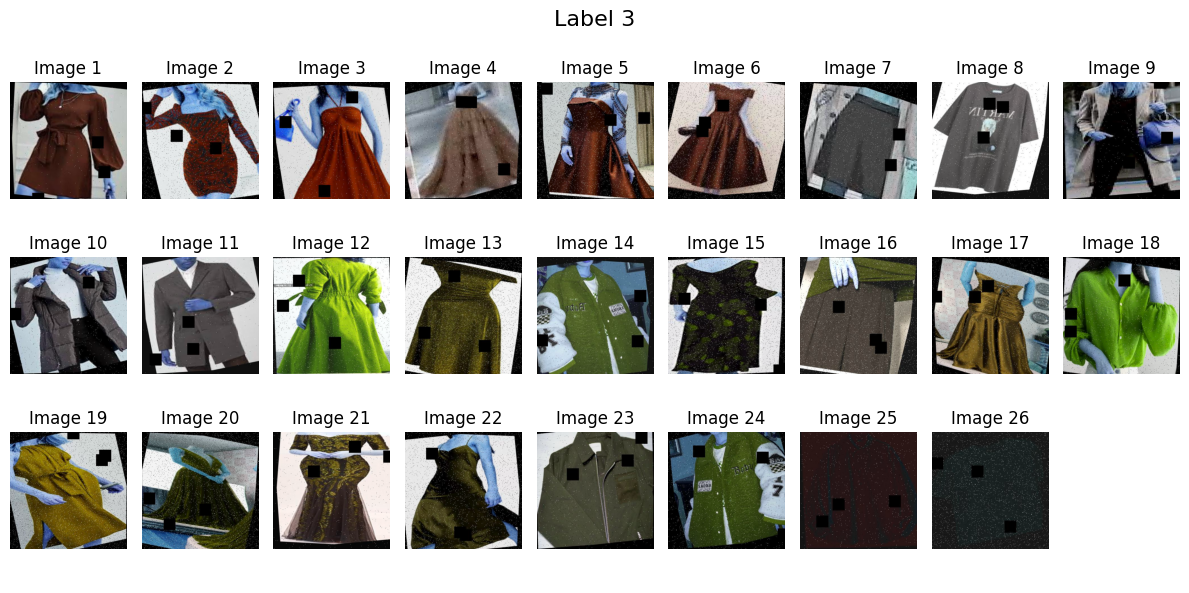

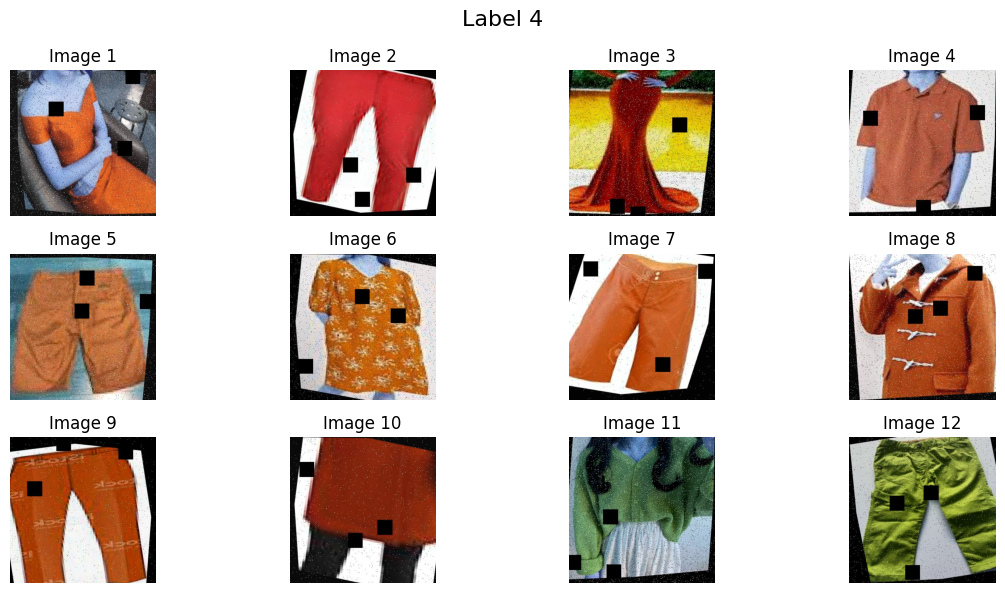

In [30]:
visiualize(labels = [0, 1, 2, 3, 4])